Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


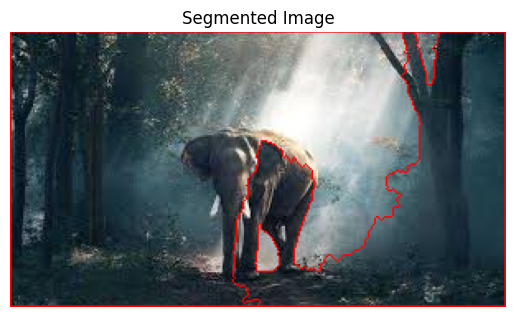

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Path to the image file
image_path = '/content/drive/My Drive/cv.jpg'

# Read the image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to get a binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Apply morphological operations to remove noise
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Determine sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Calculate the distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

# Threshold the distance transform to obtain the sure foreground
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Identify the unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Label the foreground objects
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply the watershed algorithm
markers = cv2.watershed(image, markers)
image[markers == -1] = [0, 0, 255]

# Display the segmented image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image')
plt.axis('off')
plt.show()